# Model transfer

One of the defining features of the PCNtoolkit is the ability to transfer models to new data from unseen sites. Transfering a HBR model amounts to estimating batch effect coefficients that follow a distribution that was learned from the original training data. This means that the new coefficients are informed by what is known from previous observations/

We will demonstrate the transfer method here on a small dataset from which we hold out some data. We use the fcon1000 dataset, which is easily loaded from a built-in function in the PCNtoolkit. 



In [ ]:
from pcntoolkit import load_fcon1000, HBR, NormativeModel
import arviz as az
import matplotlib.pyplot as plt
from pcntoolkit.util.plotter import plot_centiles_advanced


In [ ]:
#  Use default likelihood; Normal, with bspline in mu and sigma, and a random intercept for mu
model = NormativeModel(HBR(), save_dir ="../out/models/transfer_model")

# Load the FCON data
data = load_fcon1000()
# Drop all but the first three response vars
data=data.sel({"response_vars":data.response_vars[:3]})

# Select a few sites at random for transfering
sites_for_transfer = ["Berlin_Margulies", "Oxford"]
# Split by those sites
transfer_data,reference_data  = data.batch_effects_split({"site":sites_for_transfer},names=( "transfer", "reference"))
# Split into train and test setss
reference_train, reference_test = reference_data.train_test_split((0.8, 0.2))
transfer_train, transfer_test = transfer_data.train_test_split((0.8, 0.2))

In [ ]:
# Fit a model
model.fit_predict(reference_train, reference_test)


Process: 37395 - 2025-11-19 16:06:19 - Fitting models on 3 response variables.
Process: 37395 - 2025-11-19 16:06:19 - Fitting model for lh_G&S_frontomargin_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,18,0.16,31
,2000,14,0.16,63
,2000,46,0.17,63
,2000,84,0.16,127


Process: 37395 - 2025-11-19 16:06:32 - Fitting model for lh_G&S_occipital_inf_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,39,0.15,31
,2000,42,0.17,95
,2000,40,0.19,31
,2000,41,0.16,31


Process: 37395 - 2025-11-19 16:06:43 - Fitting model for lh_G&S_paracentral_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,35,0.16,31
,2000,62,0.16,127
,2000,107,0.15,255
,2000,46,0.16,31


Sampling: []


Process: 37395 - 2025-11-19 16:06:56 - Making predictions on 3 response variables.
Process: 37395 - 2025-11-19 16:06:56 - Computing z-scores for 3 response variables.
Process: 37395 - 2025-11-19 16:06:56 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:06:56 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:06:57 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:06:57 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:06:57 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:06:59 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:01 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:03 - Computing log-probabilities for 3 response variables.
Process: 37395 - 2025-11-19 16:07:03 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 37395 - 2025-11-19 16:07:03 - Computing log-probabilities for lh_G&S_frontomargin_thickness.
Process: 37395 - 2025-11-19 16:07:04 - Computing log-probabilities for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:04 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 37395 - 2025-11-19 16:07:06 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 37395 - 2025-11-19 16:07:06 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:07:06 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:07 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:09 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:10 - Harmonizing data on 3 response variables.
Process: 37395 - 2025-11-19 16:07:10 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:11 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:11 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:13 - Saving model to:
	../out/models/transfer_model.


Sampling: []


Process: 37395 - 2025-11-19 16:07:13 - Making predictions on 3 response variables.
Process: 37395 - 2025-11-19 16:07:13 - Computing z-scores for 3 response variables.
Process: 37395 - 2025-11-19 16:07:13 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:13 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:13 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:14 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:07:14 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:15 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:17 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:18 - Computing log-probabilities for 3 response variables.
Process: 37395 - 2025-11-19 16:07:18 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 37395 - 2025-11-19 16:07:18 - Computing log-probabilities for lh_G&S_frontomargin_thickness.
Process: 37395 - 2025-11-19 16:07:19 - Computing log-probabilities for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:19 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 37395 - 2025-11-19 16:07:20 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 37395 - 2025-11-19 16:07:20 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:07:20 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:22 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:23 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:24 - Harmonizing data on 3 response variables.
Process: 37395 - 2025-11-19 16:07:24 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:25 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:25 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:26 - Saving model to:
	../out/models/transfer_model.


<xarray.NormData> Size: 83kB
Dimensions:            (observations: 206, response_vars: 3, covariates: 1,
                        batch_effect_dims: 2, centile: 5, statistic: 11)
Coordinates:
  * observations       (observations) int64 2kB 777 773 411 502 ... 198 823 487
  * response_vars      (response_vars) <U30 360B 'lh_G&S_frontomargin_thickne...
  * covariates         (covariates) <U3 12B 'age'
  * batch_effect_dims  (batch_effect_dims) <U4 32B 'sex' 'site'
  * centile            (centile) float64 40B 0.05 0.25 0.5 0.75 0.95
  * statistic          (statistic) <U8 352B 'EXPV' 'MACE' ... 'SMSE' 'ShapiroW'
Data variables:
    subject_ids        (observations) object 2kB 'NewYork_a_sub29216' ... 'Ca...
    Y                  (observations, response_vars) float64 5kB 2.015 ... 2.628
    X                  (observations, covariates) float64 2kB 29.06 ... 18.0
    batch_effects      (observations, batch_effect_dims) <U17 28kB 'M' ... 'C...
    Z                  (observations, response_vars) float64 5kB -1.816 ... 2...
    centiles           (centile, observations, response_vars) float64 25kB 2....
    logp               (observations, response_vars) float64 5kB -2.356 ... -...
    Yhat               (observations, response_vars) float64 5kB 2.289 ... 2.308
    statistics         (response_vars, statistic) float64 264B 0.2148 ... 0.9961
    Y_harmonized       (observations, response_vars) float64 5kB 2.058 ... 2.716
Attributes:
    real_ids:                       True
    is_scaled:                      False
    name:                           reference_test
    unique_batch_effects:           {np.str_('sex'): [np.str_('F'), np.str_('...
    batch_effect_counts:            defaultdict(<function NormData.register_b...
    covariate_ranges:               {np.str_('age'): {'mean': np.float64(28.1...
    batch_effect_covariate_ranges:  {np.str_('sex'): {np.str_('F'): {np.str_(...

Sampling: []


Process: 37395 - 2025-11-19 16:12:19 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 37395 - 2025-11-19 16:12:19 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:12:19 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:20 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:22 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:23 - Harmonizing data on 3 response variables.
Process: 37395 - 2025-11-19 16:12:23 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:24 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:25 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []


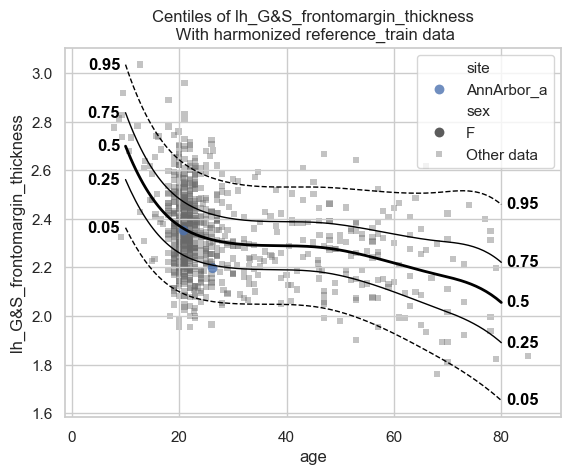

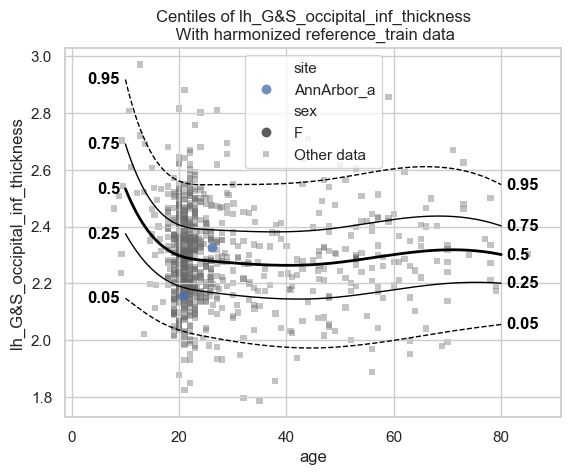

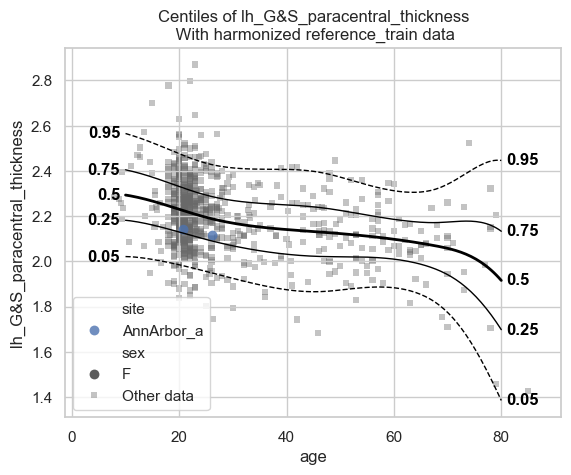

In [16]:
# Show the learned centiles
plot_centiles_advanced(model, scatter_data = reference_train, covariate_range=(10, 80), show_other_data=True)

In [17]:
# Load the model from disk (could also use the model that we just fitted, but this just shows that you can easily load and transfer a model)
fitted_model = NormativeModel.load(model.save_dir)

In [ ]:
# Transfer the model and make predictions 
transfered_model = fitted_model.transfer_predict(transfer_train, transfer_test)

Process: 37395 - 2025-11-19 16:07:35 - Transferring models on 3 response variables.
Process: 37395 - 2025-11-19 16:07:35 - Transferring model for lh_G&S_occipital_inf_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,4,0.33,15
,2000,4,0.37,15
,2000,2,0.32,11
,2000,3,0.34,15


Process: 37395 - 2025-11-19 16:07:42 - Transferring model for lh_G&S_frontomargin_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,12,0.37,15
,2000,2,0.38,7
,2000,8,0.34,15
,2000,12,0.32,15


Process: 37395 - 2025-11-19 16:07:49 - Transferring model for lh_G&S_paracentral_thickness.


Progress,Draws,Divergences,Step Size,Gradients/Draw
,2000,3,0.33,15
,2000,4,0.32,31
,2000,9,0.31,15
,2000,6,0.33,15


Sampling: []


Process: 37395 - 2025-11-19 16:07:56 - Making predictions on 3 response variables.
Process: 37395 - 2025-11-19 16:07:56 - Computing z-scores for 3 response variables.
Process: 37395 - 2025-11-19 16:07:56 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:57 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:57 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:07:57 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:07:57 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:07:58 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:00 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:01 - Computing log-probabilities for 3 response variables.
Process: 37395 - 2025-11-19 16:08:01 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 37395 - 2025-11-19 16:08:01 - Computing log-probabilities for lh_G&S_frontomargin_thickness.
Process: 37395 - 2025-11-19 16:08:01 - Computing log-probabilities for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:08:02 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 37395 - 2025-11-19 16:08:03 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 37395 - 2025-11-19 16:08:03 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:08:03 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:05 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:06 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:07 - Harmonizing data on 3 response variables.
Process: 37395 - 2025-11-19 16:08:07 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:08 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:08 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:08:09 - Saving model to:
	../out/models/transfer_model_transfer.
Process: 37395 - 2025-11-19 16:08:09 - Making predictions on 3 response variables.
Process: 37395 - 2025-11-19 16:08:09 - Computing z-scores for 3 response variables.
Process: 37395 - 2025-11-19 16:08:09 - Computing z-scores for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:10 - Computing z-scores for lh_G&S_frontomargin_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:08:10 - Computing z-scores for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:08:10 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:08:10 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:12 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:13 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:14 - Computing log-probabilities for 3 response variables.
Process: 37395 - 2025-11-19 16:08:14 - Computing log-probabilities for lh_G&S_occipital_inf_thickness.
Process: 37395 - 2025-11-19 16:08:14 - Computing log-probabilities for lh_G&S_frontomargin_thickness.
Process: 37395 - 2025-11-19 16:08:15 - Computing log-probabilities for lh_G&S_paracentral_thickness.


Sampling: []


Process: 37395 - 2025-11-19 16:08:15 - Computing yhat for 3 response variables.


Sampling: []
Sampling: []
/opt/anaconda3/envs/protocol/lib/python3.12/site-packages/pcntoolkit/dataio/norm_data.py:1083: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  subject_ids = subject_ids.stack(level="centile")
Sampling: []


Process: 37395 - 2025-11-19 16:08:16 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 37395 - 2025-11-19 16:08:16 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:08:16 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:17 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:19 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:21 - Harmonizing data on 3 response variables.
Process: 37395 - 2025-11-19 16:08:21 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:21 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:08:22 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []


Sampling: []


Process: 37395 - 2025-11-19 16:12:32 - Dataset "centile" created.
    - 150 observations
    - 150 unique subjects
    - 1 covariates
    - 3 response variables
    - 2 batch effects:
    	sex (1)
	site (1)
    
Process: 37395 - 2025-11-19 16:12:32 - Computing centiles for 3 response variables.
Process: 37395 - 2025-11-19 16:12:32 - Computing centiles for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:33 - Computing centiles for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:35 - Computing centiles for lh_G&S_paracentral_thickness.


Sampling: []
Sampling: []
Sampling: []
Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:36 - Harmonizing data on 3 response variables.
Process: 37395 - 2025-11-19 16:12:36 - Harmonizing data for lh_G&S_occipital_inf_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:37 - Harmonizing data for lh_G&S_frontomargin_thickness.


Sampling: []
Sampling: []


Process: 37395 - 2025-11-19 16:12:37 - Harmonizing data for lh_G&S_paracentral_thickness.


Sampling: []


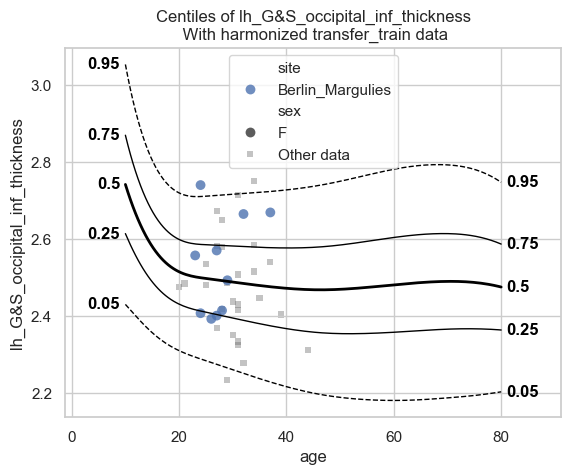

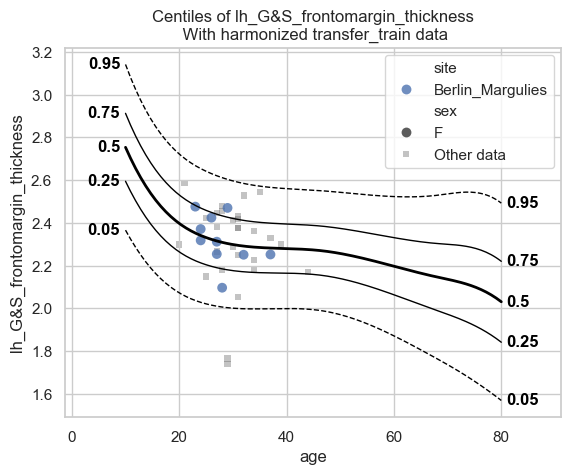

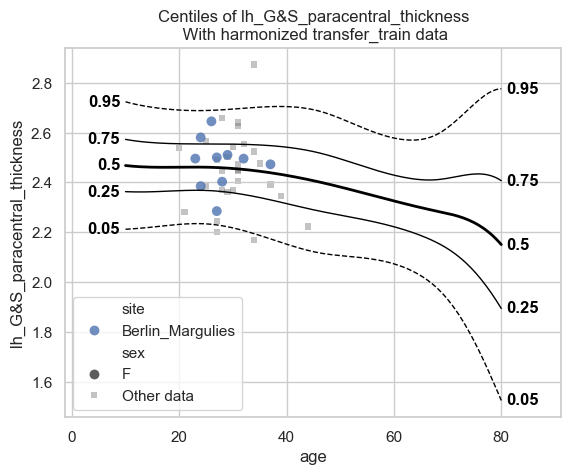

In [18]:
plot_centiles_advanced(transfered_model, scatter_data = transfer_train, covariate_range=(10, 80), show_other_data=True)

The plots show that although there was no available data at the ages above around 45, the transfered model is able to make centile predictions that follow the centiles of the reference model. Simply stated, (almost) all it learned was how much to shift the centiles up or down, given the new data. Nice!
